In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('stores_1_to_10.csv')
data

,Store,Date,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Weekly_Sales,Type,Size,Weekly_Sales.1
0,1,2/5/2010,False,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833,1643690.90,A,151315,1643690.90
1,1,2/12/2010,True,51.65,3.409,8687.47,1594.87,2.20,2144.87,223.753643,6.833,1641957.44,A,151315,1641957.44
2,1,2/19/2010,False,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833,1611968.17,A,151315,1611968.17
3,1,3/12/2010,False,60.71,3.669,8368.50,298.46,1.39,1340.29,224.562029,6.833,1439541.59,A,151315,1439541.59
4,1,3/19/2010,False,64.00,3.734,2588.06,80.89,3.20,909.76,224.716695,6.833,1472515.79,A,151315,1472515.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,10,8/17/2012,False,88.83,4.002,4407.90,0.00,7.20,3037.56,130.790968,7.170,1597868.05,B,126512,1827797.40
385,10,9/7/2012,True,83.07,4.124,11848.88,20.00,47.52,3530.47,130.932548,7.170,1661767.33,B,126512,1708283.28
386,10,9/21/2012,False,81.93,4.125,11273.56,245.91,27.00,2976.50,131.010333,7.170,1671857.57,B,126512,1671857.57
387,10,9/28/2012,False,82.52,3.966,6091.96,62.82,2.82,3350.88,131.043000,7.170,1437059.26,B,126512,1694862.41


In [3]:
data.replace(['A','B','C'], [1,2,3], inplace=True)
processed_data = data.drop(['Date', 'Weekly_Sales.1'], axis=1).copy()

In [4]:
plt.style.use('ggplot')

In [5]:
X = processed_data.values
X.shape

(389, 13)

In [6]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [7]:
pca_13 = PCA(n_components=13,random_state=2020)
pca_13.fit(X_scaled)
X_pca_13 = scaler.transform(X_scaled)

In [8]:
pca_13.explained_variance_ratio_ * 100

array([21.00216575, 14.46348055, 13.80995986, 12.00729124,  9.66173888,
        8.36234995,  6.65893597,  4.83902378,  3.54872857,  2.69893085,
        1.28434821,  1.1848609 ,  0.47818549])

In [9]:
print("Variance explained by all 13 principal components", sum(pca_13.explained_variance_ratio_ * 100))

Variance explained by all 13 principal components 100.00000000000004


In [10]:
np.cumsum(pca_13.explained_variance_ratio_ * 100)

array([ 21.00216575,  35.4656463 ,  49.27560615,  61.2828974 ,
        70.94463628,  79.30698623,  85.96592219,  90.80494598,
        94.35367454,  97.05260539,  98.3369536 ,  99.52181451,
       100.        ])

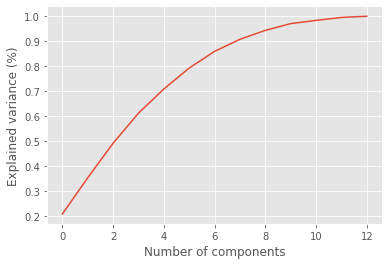

In [11]:
plt.plot(np.cumsum(pca_13.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance (%)')
plt.savefig('elbow_plot.png', dpi=100)

In [12]:
print("Variance explained by the first principal component = ", np.cumsum(pca_13.explained_variance_ratio_ * 100)[0])
print("Variance explained by the first 2 principal components = ", np.cumsum(pca_13.explained_variance_ratio_ * 100)[1])
print("Variance explained by the first 3 principal components = ", np.cumsum(pca_13.explained_variance_ratio_ * 100)[2])
print("Variance explained by the first 9 principal components = ", np.cumsum(pca_13.explained_variance_ratio_ * 100)[8])

Variance explained by the first principal component =  21.002165754090107
Variance explained by the first 2 principal components =  35.46564629947069
Variance explained by the first 3 principal components =  49.275606154603125
Variance explained by the first 9 principal components =  94.35367454372425


In [13]:
pca_2 = PCA(n_components=2,random_state=2020)
pca_2.fit(X_scaled)
X_pca_2 = scaler.transform(X_scaled)

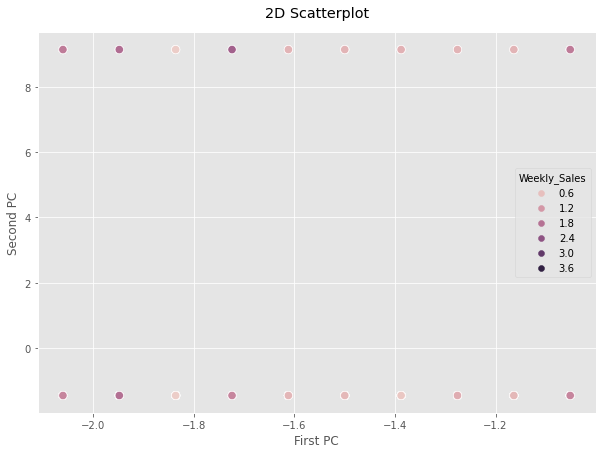

In [16]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:,1],s=70,hue=data.Weekly_Sales)
plt.title("2D Scatterplot", pad=15)
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.savefig('2d_scatterplot.png')